In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import pandas as pd

HO = pd.read_csv(path_data+'CME_HO1.csv', parse_dates=['Date'], index_col='Date')

NG = pd.read_csv(path_data+'CME_NG1.csv', parse_dates=['Date'], index_col='Date')

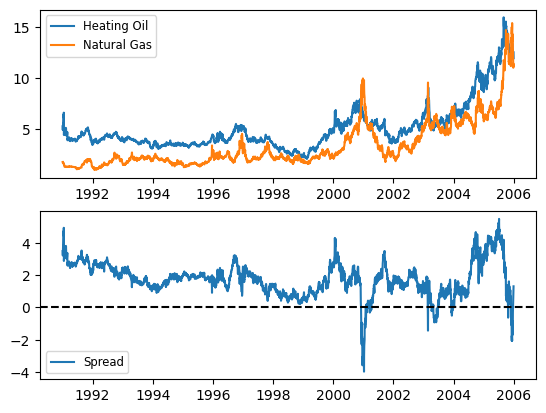

'\nNotice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.\n'

In [4]:
# exercise 01

"""
A Dog on a Leash? (Part 1)

The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in $/gallon, by 7.25, which converts it to $/millionBTU, which is the same units as Natural Gas).

The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) was obtained from Quandl.
(https://blog.quandl.com/api-for-futures-data)
"""

# Instructions

"""

    Plot Heating Oil, HO, and Natural Gas, NG, on the same subplot
        Make sure you multiply the HO price by 7.25 to match the units of NG
    Plot the spread on a second subplot
        The spread will be 7.25*HO - NG


"""

# solution
import matplotlib.pyplot as plt
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

#----------------------------------#

# Conclusion

"""
Notice from the plot that when Heating Oil briefly dipped below Natural Gas, it quickly reverted back up.
"""

In [5]:
# exercise 02

"""
A Dog on a Leash? (Part 2)

To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG.
"""

# Instructions

"""

    Perform the adfuller test on HO and on NG separately, and save the results (results are a list)
        The argument for adfuller must be a series, so you need to include the column 'Close'
        Print just the p-value (item [1] in the list)
    Do the same thing for the spread, again converting the units of HO, and using the column 'Close' of each DataFrame

"""

# solution

# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

#----------------------------------#

# Conclusion

"""
As we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.
"""

The p-value for the ADF test on HO is  0.019831028071626566
The p-value for the ADF test on NG is  0.00454728495654255
The p-value for the ADF test on the spread is  0.00011887051827353499


'\nAs we expected, we cannot reject the hypothesis that the individual futures are random walks, but we can reject that the spread is a random walk.\n'

In [6]:
BTC = pd.read_csv(path_data+'BTC.csv', parse_dates=['Date'], index_col='Date')
ETH = pd.read_csv(path_data+'ETH.csv', parse_dates=['Date'], index_col='Date')

In [7]:
# exercise 03

"""
Are Bitcoin and Ethereum Cointegrated?

Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, and then perform an ADF test on the residuals of the regression. In the last example, there was no need to perform the first step since we implicitly assumed the cointegration vector was (1, -1). In other words, we took the difference between the two series (after doing a units conversion). Here, you will do both steps.

You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). If we call the regression coefficient 'beta', then the cointegration vector is simply (1, -'beta') . Then perform the ADF test on BTC -'beta' ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.
"""

# Instructions

"""
Import the statsmodels module for regression and the adfuller function
Add a constant to the ETH DataFrame using sm.add_constant()
Regress BTC on ETH using sm.OLS(y,x).fit(), where y is the dependent variable and x is the independent variable, and save the results in result.

    The intercept is in result.params[0] and the slope in result.params[1]

Run ADF test on BTC -'beta' ETH
"""

# solution

# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

#----------------------------------#

# Conclusion

"""
The data suggests that Bitcoin and Ethereum are cointegrated.
"""

The p-value for the ADF test is  0.023369002323472794


/tmp/ipykernel_337301/2097747045.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = result.params[1]


'\nThe data suggests that Bitcoin and Ethereum are cointegrated.\n'

In [11]:
temp_NY = pd.read_csv(path_data+'NOAA_TAVG.csv', index_col='DATE')
temp_NY.head()

,TAVG
DATE,
1870,53.8
1871,51.3
1872,51.3
1873,50.9
1874,51.3


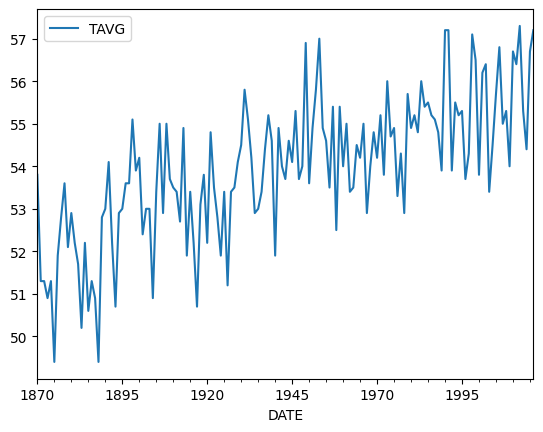

The p-value for the ADF test is  0.5832938987871108


'\nThe data seems to follow a random walk with drift.\n'

In [12]:
# exercise 04

"""
Is Temperature a Random Walk (with Drift)?

An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics covered in this class.

The DataFrame temp_NY contains the average annual temperature in Central Park, NY from 1870-2016 (the data was downloaded from the NOAA here). Plot the data and test whether it follows a random walk (with drift).
(https://www.ncdc.noaa.gov/cdo-web/search)
"""

# Instructions

"""

    Convert the index of years into a datetime object using pd.to_datetime(), and since the data is annual, pass the argument format='%Y'.
    Plot the data using .plot()
    Compute the p-value the Augmented Dickey Fuller test using the adfuller function.
    Save the results of the ADF test in result, and print out the p-value in result[1].

"""

# solution

# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

#----------------------------------#

# Conclusion

"""
The data seems to follow a random walk with drift.
"""

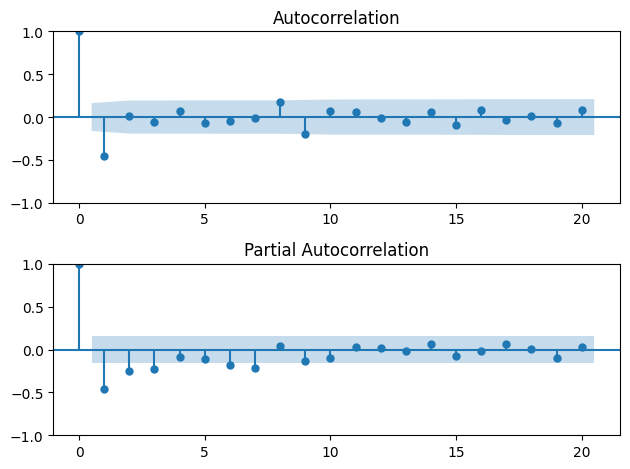

'\nThere is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.\n'

In [14]:
# exercise 05

"""
Getting "Warmed" Up: Look at Autocorrelations

Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.
"""

# Instructions

"""

    Import the modules for plotting the sample ACF and PACF
    Take first differences of the DataFrame temp_NY using the pandas method .diff()
    Create two subplots for plotting the ACF and PACF
        Plot the sample ACF of the differenced series
        Plot the sample PACF of the differenced series

"""

# solution

# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.tight_layout()
plt.show()

#----------------------------------#

# Conclusion

"""
There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.
"""

In [15]:
# exercise 06

"""
Which ARMA Model is Best?

Recall from Chapter 3 that the Akaike Information Criterion (AIC) can be used to compare models with different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters to discourage overfitting. Lower AIC scores are better.

Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion. The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.

The annual change in temperature is in a DataFrame chg_temp.
"""

# Instructions

"""

    For each ARMA model, create an instance of the ARIMA class, passing the data and the order=(p,d,q). p is the autoregressive order; q is the moving average order; d is the number of times the series has been differenced.
    Fit the model using the method .fit().
    Print the AIC value, found in the .aic element of the results.

"""

# solution

# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1,1,0))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

#----------------------------------#

# Conclusion
# ????????????????????????????????????????
"""
The ARMA(1,1) has the lowest AIC values among the three models.
"""

The AIC for an AR(1) is:  510.534689873311
The AIC for an AR(2) is:  501.927412340914
The AIC for an ARMA(1,1) is:  611.566505797921


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/st

'\nThe ARMA(1,1) has the lowest AIC values among the three models.\n'

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


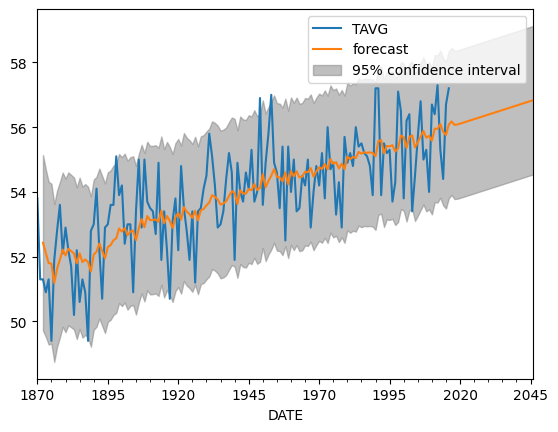

'\nAccording to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.\n'

In [16]:
# exercise 07

"""
Don't Throw Out That Winter Coat Yet

Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, including confidence bands around that estimate. Keep in mind that the estimate of the drift will have a much bigger impact on long range forecasts than the ARMA parameters.

Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. In this exercise, you will use the ARIMA module on the temperature data (before differencing), which is identical to using the ARMA module on changes in temperature, followed by taking cumulative sums of these changes to get the temperature forecast.

Because temperatures are trending up over time, you will also need to add a trend component when you define the ARIMA model. In the exercise, you'll use a linear trend with time by setting the argument trend='t'. You can also try other trend models to see how the forecasts change. For example, for a quadratic trend 'aplha'+'beta'*'tau'+c*'tau'², set trend=[0,1,1], to include both a linear term, , and quadratic term, c*'tau'², in the model.

The data is preloaded in a DataFrame called temp_NY.
"""

# Instructions

"""

    Create an instance of the ARIMA class called mod for an integrated ARMA(1,1) model, or ARIMA(1,1,1) model
        The d in order(p,d,q) is one, since we first differenced once
        Fit mod using the .fit() method and call the results res
    Forecast the series using the plot_predict() method on res
        Choose the start date as 1872 and the end date as 2046

"""

# solution

# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, trend='t', order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots()
temp_NY.plot(ax=ax)
plot_predict(res, start='1872', end='2046', ax=ax)
plt.show()

#----------------------------------#

# Conclusion

"""
According to the model, the temperature is expected to be about 0.6 degrees higher in 30 years (almost entirely due to the trend), but the 95% confidence interval around that is over 5 degrees.
"""